In [1]:
import pandas as pd
import numpy as np



In [2]:
from sklearn.datasets import load_iris
iris =load_iris()

In [3]:
print(dir(iris))

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']


In [4]:
df = pd.DataFrame(iris.data)

In [5]:
df['target']= iris.target

In [6]:
df

,0,1,2,3,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [7]:
df.isna().any()

0         False
1         False
2         False
3         False
target    False
dtype: bool

In [8]:
iris.target_names
#


array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [9]:
df['target_names'] = df['target'].apply(lambda x: iris.target_names[x])
df

,0,1,2,3,target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [10]:
setosa_num=df[df['target']==0].count()
setosa_num
# df[df.target==1].head()

0               50
1               50
2               50
3               50
target          50
target_names    50
dtype: int64

In [11]:
df.rename(columns=dict(zip(df.columns[:4], iris.feature_names)), inplace=True)

In [12]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [13]:
from sklearn.model_selection import train_test_split
y= df['target']
X= df.drop(['target','target_names'],axis=1)
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2)

In [30]:
from sklearn.ensemble import RandomForestClassifier
rf_model= RandomForestClassifier(n_estimators=50)
rf_model.fit(X_train,y_train)


RandomForestClassifier(n_estimators=50)

In [31]:
preds = rf_model.predict(X_test)
score = rf_model.score(X_test,y_test)
score

0.9333333333333333

In [25]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,preds)
cm


array([[ 9,  0,  0],
       [ 0, 14,  2],
       [ 0,  0,  5]])

<class 'module'>


Text(33.22222222222222, 0.5, 'Truth')

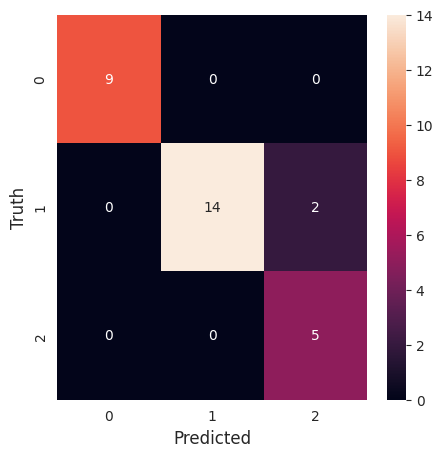

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
print(type(plt))
plt.figure(figsize=(5,5))
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted', fontsize=12)  # Explicitly using plt module
plt.ylabel('Truth', fontsize=12)      # Explicitly using plt module